# Desafio Tecnico - Parte II (Analíse dos Robos)

In [1]:
# Importando Pacotes

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_robos_res = pd.read_csv('desafio/Robos_resultado.csv')
df_robos_trade = pd.read_csv('desafio/Robos_trade.csv', sep = ';')

In [3]:
df_robos_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 67 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  494 non-null    int64  
 1   date        494 non-null    object 
 2   2772803     494 non-null    float64
 3   2772804     494 non-null    float64
 4   2772805     494 non-null    float64
 5   2772806     494 non-null    float64
 6   2772807     494 non-null    float64
 7   2772808     494 non-null    float64
 8   2772809     494 non-null    float64
 9   2772810     494 non-null    float64
 10  2772811     494 non-null    float64
 11  2772812     494 non-null    float64
 12  2772813     494 non-null    float64
 13  2772814     494 non-null    float64
 14  2772815     494 non-null    float64
 15  2772816     494 non-null    float64
 16  2772817     494 non-null    float64
 17  2772818     494 non-null    float64
 18  2772819     494 non-null    float64
 19  2772820     494 non-null    f

In [4]:
df_robos_trade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 66 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     495 non-null    object 
 1   2772803  495 non-null    float64
 2   2772804  495 non-null    float64
 3   2772805  495 non-null    float64
 4   2772806  495 non-null    float64
 5   2772807  495 non-null    float64
 6   2772808  495 non-null    float64
 7   2772809  495 non-null    float64
 8   2772810  495 non-null    float64
 9   2772811  495 non-null    float64
 10  2772812  495 non-null    int64  
 11  2772813  495 non-null    int64  
 12  2772814  495 non-null    int64  
 13  2772815  495 non-null    float64
 14  2772816  495 non-null    float64
 15  2772817  495 non-null    float64
 16  2772818  495 non-null    float64
 17  2772819  495 non-null    int64  
 18  2772820  495 non-null    int64  
 19  2772821  495 non-null    int64  
 20  2772822  495 non-null    int64  
 21  2772859  495 non

In [5]:
df_robos_res.duplicated().sum()

0

In [6]:
df_robos_trade.duplicated().sum()

0

In [7]:
df_robos_res

,Unnamed: 0,date,2772803,2772804,2772805,2772806,2772807,2772808,2772809,2772810,...,2772928,2772929,2772930,2772931,2772932,2772933,2772934,2772980,2772981,2772982
0,1,2020-05-07,79.0,79.0,79.0,-358.0,-119.0,-119.0,86.0,0.0,...,90.0,90.0,42.0,80.0,42.0,42.0,2.0,2.0,-57.857143,47.0
1,2,2020-05-08,57.0,57.0,57.0,-19.0,-138.0,-138.0,-60.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,-44.000000,0.0
2,3,2020-05-11,73.0,73.0,73.0,-129.0,-195.0,-195.0,-195.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-72.0,-72.0,30.750000,0.0
3,4,2020-05-12,53.0,53.0,53.0,-264.0,-204.0,-204.0,-59.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,6.400000,0.0
4,5,2020-05-13,-81.0,-81.0,-81.0,0.0,-102.0,-102.0,43.0,0.0,...,-41.0,-41.0,-40.0,-57.0,-59.0,-59.0,6.0,6.0,-12.666667,-57.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,490,2021-09-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9.0,-9.0,-44.0,-58.0,-64.0,-64.0,-76.0,-76.0,14.666667,-62.0
490,491,2021-10-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,40.0,77.0,40.0,40.0,-80.0,-80.0,30.000000,37.0
491,492,2021-11-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,39.0,0.0,0.0,-79.0,-79.0,30.000000,0.0
492,493,2022-01-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,55.0,55.0,41.0,39.0,41.0,41.0,8.0,8.0,63.200000,39.0


In [8]:
df_robos_trade

,date,2772803,2772804,2772805,2772806,2772807,2772808,2772809,2772810,2772811,...,2772928,2772929,2772930,2772931,2772932,2772933,2772934,2772980,2772981,2772982
0,05/05/2020,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3,3,2.0,0.0
1,07/05/2020,1.0,1.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,...,1.0,1.0,1.0,2.0,1.0,1.0,3,3,5.0,1.0
2,08/05/2020,1.0,1.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3,3,1.0,0.0
3,11/05/2020,1.0,1.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3,3,3.0,0.0
4,12/05/2020,1.0,1.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3,3,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,02/09/2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,3,3,2.0,1.0
491,25/10/2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,2.0,1.0,1.0,3,3,1.0,1.0
492,30/11/2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,3,3,1.0,0.0
493,11/01/2022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,3,3,4.0,1.0


#### Informações

- A coluna Unnamed não apresenta nenhuma informação 
- As o dia 05/05/2020 não aparece no número de trades
- Os dois Data Frames apresentão um salto temporal linhas
- Não existem dados NA e duplicados

## Tratamento de Dados

#### Transformando a Coluna Data

In [9]:
# Transformando dados em datatime

df_robos_trade['date'] = pd.to_datetime(df_robos_trade.date, format='%d/%m/%Y')
df_robos_res['date'] = pd.to_datetime(df_robos_res.date, format='%Y-%m-%d')


In [10]:
df_robos_trade.drop(0, inplace= True)

In [11]:
df_robos_res.date.info()

<class 'pandas.core.series.Series'>
RangeIndex: 494 entries, 0 to 493
Series name: date
Non-Null Count  Dtype         
--------------  -----         
494 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 4.0 KB


In [12]:
df_robos_trade.date.info()


<class 'pandas.core.series.Series'>
RangeIndex: 494 entries, 1 to 494
Series name: date
Non-Null Count  Dtype         
--------------  -----         
494 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 4.0 KB


In [13]:
df_robos_trade = df_robos_trade.reset_index(drop = True)

In [14]:
# Coferindo se as datas batem

registros = np.array([True] * len(df_robos_res.date))
registros = (df_robos_res['date'] == df_robos_trade['date']) & True
    

In [15]:
registros[registros == True]

0      True
1      True
2      True
3      True
4      True
       ... 
489    True
490    True
491    True
492    True
493    True
Name: date, Length: 494, dtype: bool

- Todas as datas são iguais

#### Retirando Colunas sem Informação

In [16]:
df_robos_res.drop('Unnamed: 0', 1, inplace= True)

In [17]:
df_robos_res.columns

Index(['date', '2772803', '2772804', '2772805', '2772806', '2772807',
       '2772808', '2772809', '2772810', '2772811', '2772812', '2772813',
       '2772814', '2772815', '2772816', '2772817', '2772818', '2772819',
       '2772820', '2772821', '2772822', '2772859', '2772860', '2772861',
       '2772862', '2772863', '2772864', '2772865', '2772866', '2772867',
       '2772868', '2772869', '2772870', '2772871', '2772872', '2772873',
       '2772874', '2772875', '2772876', '2772877', '2772878', '2772879',
       '2772914', '2772915', '2772916', '2772917', '2772918', '2772919',
       '2772920', '2772921', '2772922', '2772923', '2772924', '2772925',
       '2772926', '2772927', '2772928', '2772929', '2772930', '2772931',
       '2772932', '2772933', '2772934', '2772980', '2772981', '2772982'],
      dtype='object')

## Análise Descritiva dos Dados

In [18]:
# Criando Coluna Ano, Trimestre e Mês df_robos_res

df_robos_res['Ano'] = df_robos_res.date.dt.to_period('Y')
df_robos_res['Trimestre'] = df_robos_res.date.dt.to_period('Q')
df_robos_res['Mes'] = df_robos_res.date.dt.to_period('M')

In [19]:
# Criando Coluna Ano, Trimestre e Mês df_robos_trade

df_robos_trade['Ano'] = df_robos_trade.date.dt.to_period('Y')
df_robos_trade['Trimestre'] = df_robos_trade.date.dt.to_period('Q')
df_robos_trade['Mes'] = df_robos_trade.date.dt.to_period('M')

In [20]:
df_robos_res_ano = df_robos_res.groupby(by = 'Ano', as_index= False).sum()

In [21]:
df_robos_res_ano = df_robos_res_ano.T

In [22]:

df_robos_res_ano = df_robos_res_ano.reset_index()
df_robos_res_ano.columns = ['Robos', '2020', '2021', '2022']

In [23]:
df_robos_res_ano.drop(0, inplace= True)

In [24]:
df_res_mean = df_robos_res_ano.mean()
df_res_mean

Robos            inf
2020      659.147878
2021     2105.384523
2022      727.576794
dtype: float64

In [25]:
melhor_robos_2020 = np.array([True] * len(df_robos_res_ano['2020']))
melhor_robos_2020 = (df_robos_res_ano['2020'] >= 1300) & True

In [26]:
df_max_res_2020 = df_robos_res_ano[['Robos','2020']][melhor_robos_2020 == True]

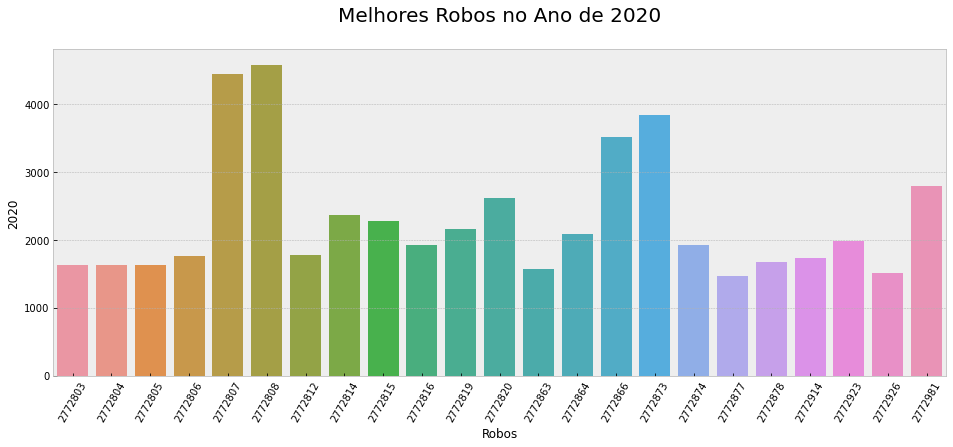

In [27]:
plt.figure(figsize= (16, 6))
plt.style.use('bmh')
sns.barplot(data = df_max_res_2020, x = 'Robos', y = '2020')
plt.xticks(rotation= 60)
plt.title('Melhores Robôs no Ano de 2020\n', fontsize = 20)
plt.show()

#### Melhores Robos de 2021

In [28]:
melhor_robos_2021 = np.array([True] * len(df_robos_res_ano['2021']))
melhor_robos_2021 = (df_robos_res_ano['2021'] >= 3000) & True

In [29]:
df_max_res_2021 = df_robos_res_ano[['Robos','2021']][melhor_robos_2021 == True]

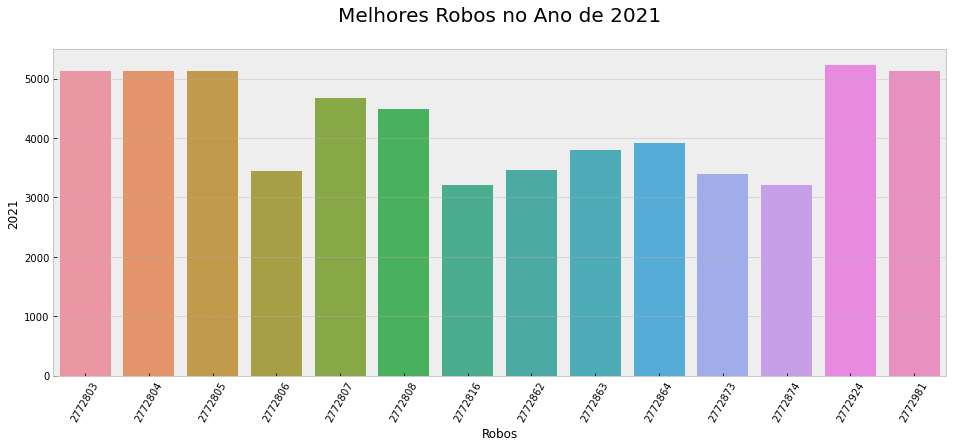

In [30]:
plt.figure(figsize= (16, 6))
plt.style.use('bmh')
sns.barplot(data = df_max_res_2021, x = 'Robos', y = '2021')
plt.xticks(rotation= 60)
plt.title('Melhores Robos no Ano de 2021\n', fontsize = 20)
plt.show()

#### Melhores Robos de 2022

In [31]:
melhor_robos_2022 = np.array([True] * len(df_robos_res_ano['2022']))
melhor_robos_2022 = (df_robos_res_ano['2022'] >= 1500) & True

In [32]:
df_max_res_2022 = df_robos_res_ano[['Robos','2022']][melhor_robos_2022 == True]

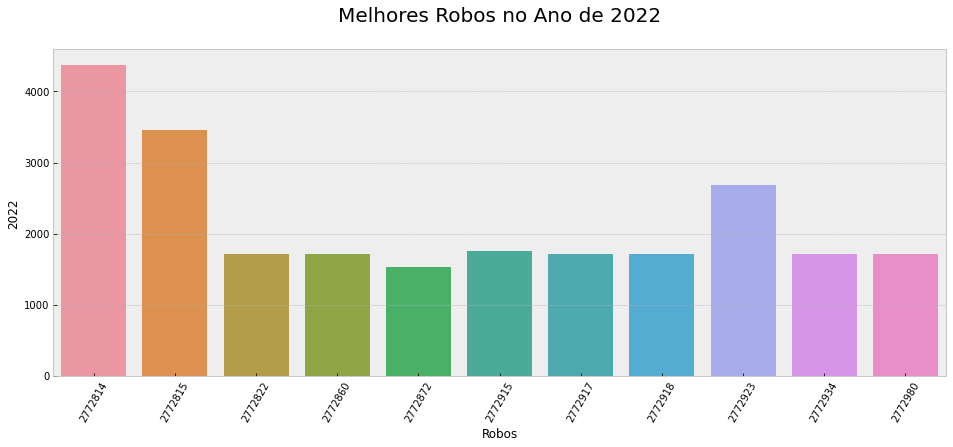

In [33]:
plt.figure(figsize= (16, 6))
plt.style.use('bmh')
sns.barplot(data = df_max_res_2022, x = 'Robos', y = '2022')
plt.xticks(rotation= 60)
plt.title('Melhores Robos no Ano de 2022\n', fontsize = 20)
plt.show()

#### Análise Média Anual 

In [34]:
df_robos_res_ano_mean = df_robos_res.groupby(by = 'Ano', as_index= False).mean()

In [35]:
df_robos_res_ano_mean = df_robos_res_ano_mean.T

In [36]:

df_robos_res_ano_mean.columns = ['2020', '2021', '2022']

In [37]:
df_robos_res_ano_mean.drop('Ano', inplace= True)

In [38]:
df_robos_res_ano_mean.mean()

2020    3.970770
2021    8.523824
2022    8.982430
dtype: float64

In [39]:
melhores_robos_2020 = df_robos_res_ano_mean['2020'] >= 13
df_robos_res_ano_mean_2020 = df_robos_res_ano_mean[melhores_robos_2020]

In [40]:
df_robos_res_ano_mean_2020.sort_values('2020', inplace = True)

In [41]:
df_robos_res_ano_mean_2020.tail(9)

,2020,2021,2022
2772819,13.036145,10.793522,11.160494
2772815,13.729123,-1.32884,42.731456
2772814,14.224958,-3.330737,53.982185
2772820,15.716867,5.643725,16.135802
2772981,16.866071,20.780875,15.618766
2772866,21.204819,11.072874,-2.888889
2772873,23.150602,13.769231,4.580247
2772807,26.795181,18.890688,-33.296296
2772808,27.554217,18.182186,-27.567901


In [42]:
best_media_2020 = df_robos_res_ano_mean_2020.index
best_media_2020

Index(['2772819', '2772815', '2772814', '2772820', '2772981', '2772866',
       '2772873', '2772807', '2772808'],
      dtype='object')

In [43]:
melhores_robos_2021 = df_robos_res_ano_mean['2021'] >= 15
df_robos_res_ano_mean_2021 = df_robos_res_ano_mean[melhores_robos_2021]

In [44]:
df_robos_res_ano_mean_2021.sort_values('2021', inplace = True)

In [45]:
df_robos_res_ano_mean_2021.tail(9)

,2020,2021,2022
2772863,9.451807,15.34413,18.45679
2772864,12.60241,15.866397,15.444444
2772808,27.554217,18.182186,-27.567901
2772807,26.795181,18.890688,-33.296296
2772803,9.777108,20.740891,4.395062
2772804,9.777108,20.740891,4.395062
2772805,9.777108,20.740891,4.395062
2772981,16.866071,20.780875,15.618766
2772924,2.066265,21.165992,0.555556


In [46]:
best_media_2021 = df_robos_res_ano_mean_2021.index
best_media_2021

Index(['2772863', '2772864', '2772808', '2772807', '2772803', '2772804',
       '2772805', '2772981', '2772924'],
      dtype='object')

In [47]:
melhores_robos_2022 = df_robos_res_ano_mean['2022'] >= 20
df_robos_res_ano_mean_2022 = df_robos_res_ano_mean[melhores_robos_2022]

In [48]:
df_robos_res_ano_mean_2022.sort_values('2022', inplace = True)

In [49]:
df_robos_res_ano_mean_2022.tail(5)

,2020,2021,2022
2772917,-11.295181,6.267206,21.209877
2772915,-10.638554,6.105263,21.740741
2772923,11.945783,10.593117,33.141975
2772815,13.729123,-1.32884,42.731456
2772814,14.224958,-3.330737,53.982185


In [50]:
best_media_2022 = df_robos_res_ano_mean_2022.index
best_media_2022

Index(['2772918', '2772934', '2772980', '2772860', '2772822', '2772917',
       '2772915', '2772923', '2772815', '2772814'],
      dtype='object')

#### Boxplot dos  melhores robos por ano


In [51]:
df_best_media_2020 = df_robos_res[best_media_2020]

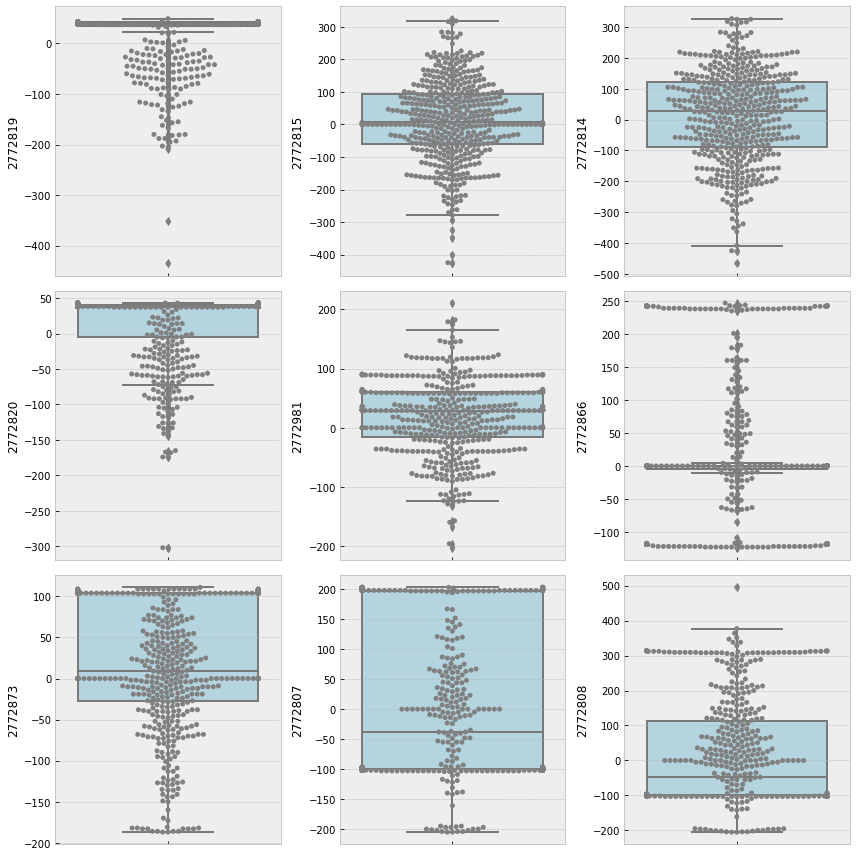

In [52]:
plt.figure(figsize= (12,12))

for i in range(0, len(best_media_2020)):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y = df_robos_res[best_media_2020[i]], 
                   color = 'lightblue')
    sns.swarmplot(
               y=df_robos_res[best_media_2020[i]], 
               data=df_robos_res, 
               color="grey")
    plt.tight_layout()


In [53]:
df_best_media_2021 = df_robos_res[best_media_2021]

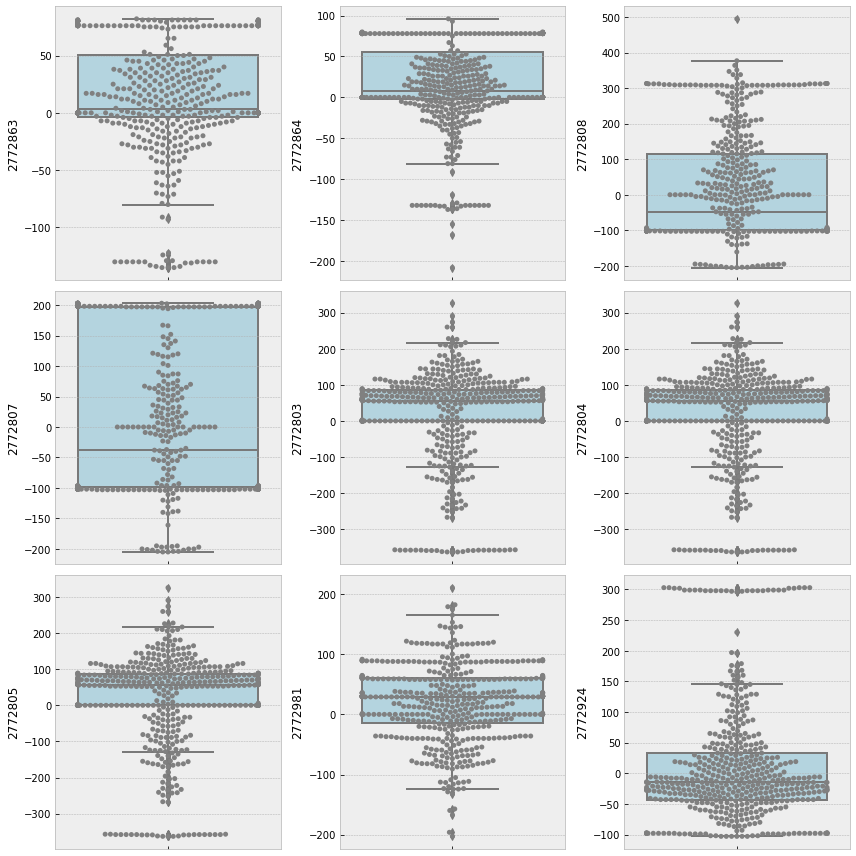

In [54]:
plt.figure(figsize= (12,12))

for i in range(0, len(best_media_2021)):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y = df_robos_res[best_media_2021[i]], 
                   color = 'lightblue')
    sns.swarmplot(
               y=df_robos_res[best_media_2021[i]], 
               data=df_robos_res, 
               color="grey")
    plt.tight_layout()


In [55]:
df_best_media_2022 = df_robos_res[best_media_2022].join(df_robos_res.Ano)

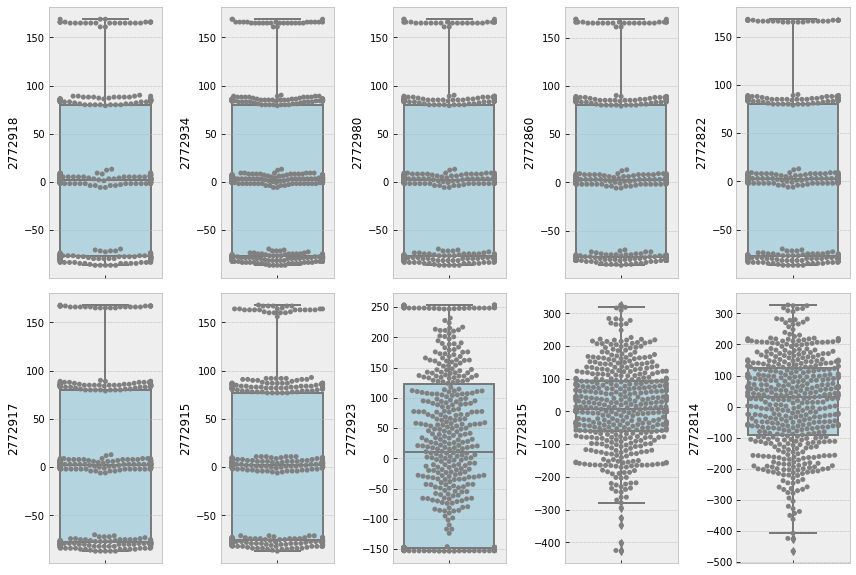

In [56]:
plt.figure(figsize= (12,12))

for i in range(0, len(best_media_2022)):
    plt.subplot(3, int(len(best_media_2022)/2), i + 1)
    sns.boxplot(y = df_robos_res[best_media_2022[i]], 
                   color = 'lightblue')
    sns.swarmplot(
               y=df_robos_res[best_media_2022[i]], 
               data=df_robos_res, 
               color="grey")
    plt.tight_layout()


#### Informações

- Alguns robos apresentão retornos altos em um ano, contudo não sustentam os mesmos números para o proxímo ano
- Na analíse das médias não é possivel notar padrão entre os robos com os maiores valores
- O ano de 2022 ainda aparece muito volatil

## Análise do Número de Operações 

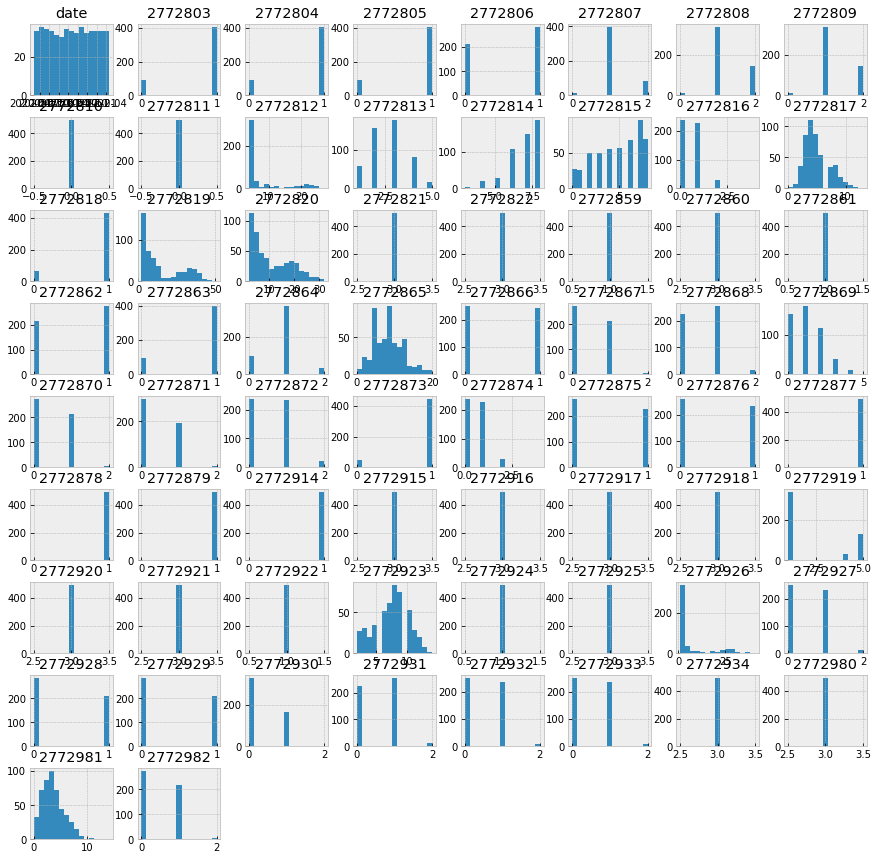

In [57]:
df_robos_trade.hist(figsize = (15, 15), bins = 15)
plt.show()

In [58]:
df_trade_mean_ano = df_robos_trade.groupby(by = 'Ano', as_index= False).mean()


In [59]:
df_trade_mean_ano = df_trade_mean_ano.T
df_trade_mean_ano.drop('Ano', inplace= True)
df_trade_mean_ano.columns = ['2020', '2021', '2022']

In [60]:
df_trade_mean_ano.sort_values(by = '2020', inplace = True)

In [61]:
max_trade_mean_ano = df_trade_mean_ano.tail(10).index


In [62]:
max_trade_mean_ano

Index(['2772981', '2772815', '2772817', '2772814', '2772926', '2772923',
       '2772812', '2772865', '2772820', '2772819'],
      dtype='object')

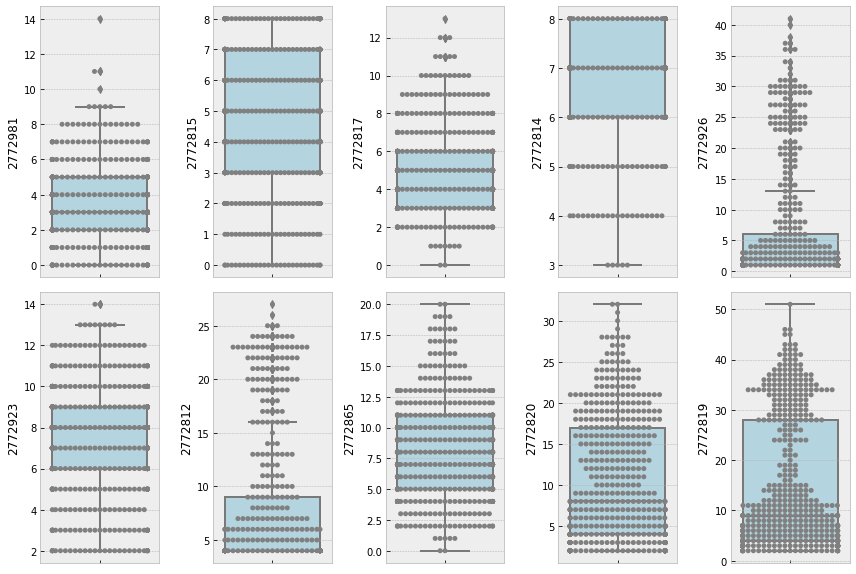

In [63]:
plt.figure(figsize= (12,12))

for i in range(0, len(max_trade_mean_ano)):
    plt.subplot(3, int(len(max_trade_mean_ano)/2), i + 1)
    sns.boxplot(y = df_robos_trade[max_trade_mean_ano[i]], 
                   color = 'lightblue')
    sns.swarmplot(
               y=df_robos_trade[max_trade_mean_ano[i]], 
               data=df_robos_trade, 
               color="grey")
    plt.tight_layout()

In [64]:
min_trade_mean_ano = df_trade_mean_ano.head(10).index


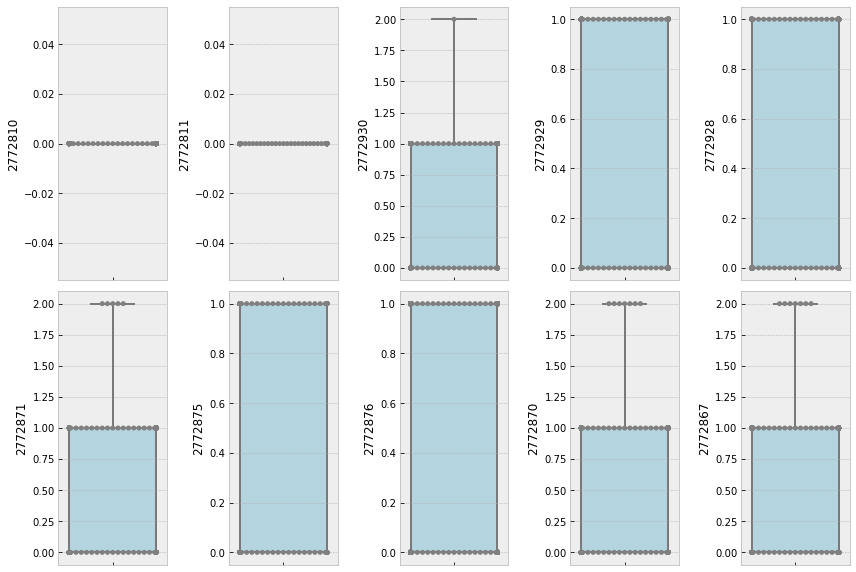

In [65]:
plt.figure(figsize= (12,12))

for i in range(0, len(min_trade_mean_ano)):
    plt.subplot(3, int(len(min_trade_mean_ano)/2), i + 1)
    sns.boxplot(y = df_robos_trade[min_trade_mean_ano[i]], 
                   color = 'lightblue')
    sns.swarmplot(
               y=df_robos_trade[min_trade_mean_ano[i]], 
               data=df_robos_trade, 
               color="grey")
    plt.tight_layout()

#### Informações

- Existem 2 robôs  que não realizaram operações
- Quase todos os robôs  não operam todos os dias 
- A grande maioria dos robôs  fazem em média entre uma  ou duas operação 
- Existe apenas 10 robôs  tem média de operação maior que 3 durante os anos

### Análise de Correção entre Resultados x Operações

#### Correlação entre resultado e o número de operações dos robos que mais operam 

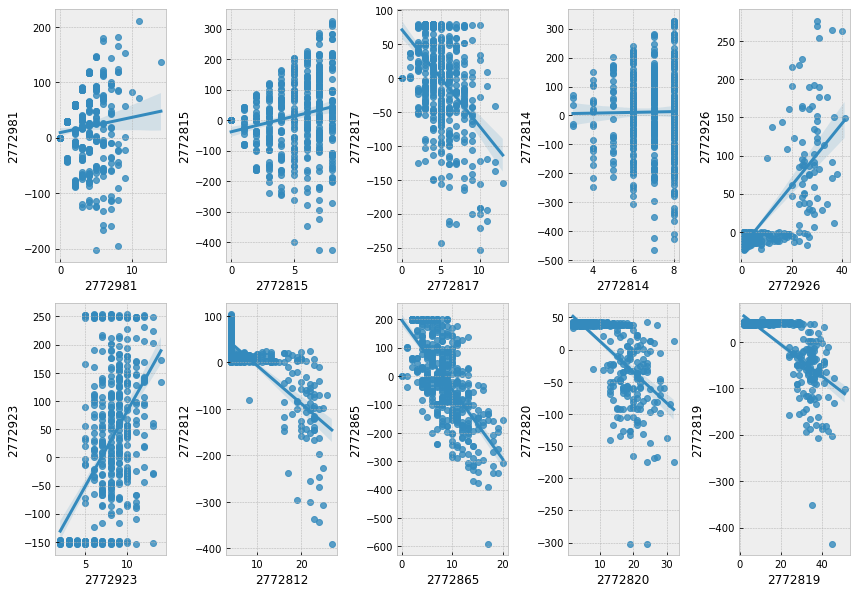

In [66]:
plt.figure(figsize= (12,12))
for i in range(0, len(max_trade_mean_ano)):
    plt.subplot(3, int(len(max_trade_mean_ano)/2), i + 1)
    sns.regplot(y = df_robos_res[max_trade_mean_ano[i]], 
                  x = df_robos_trade[max_trade_mean_ano[i]] 
                   )
    plt.tight_layout()

#### Correlação entre resultado e o número de operações dos robos que menos operam 

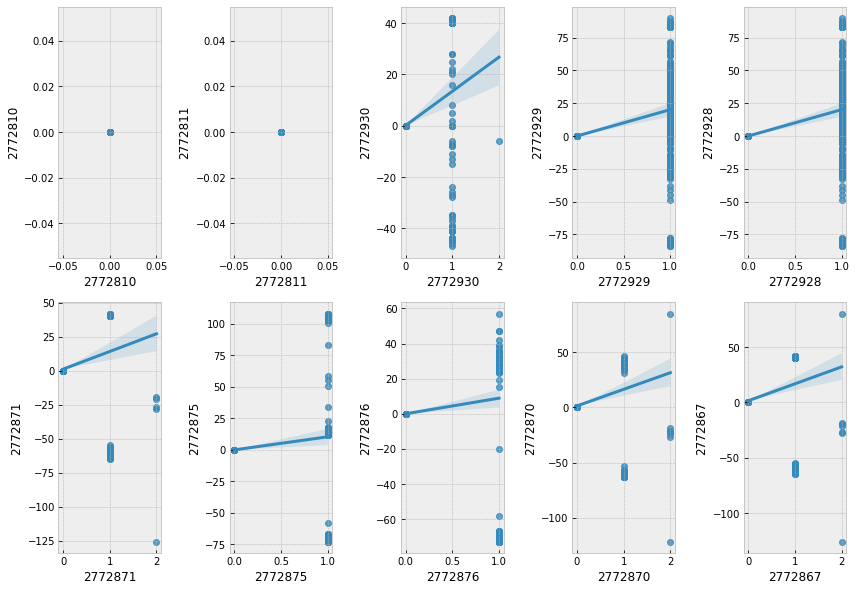

In [67]:
plt.figure(figsize= (12,12))
for i in range(0, len(min_trade_mean_ano)):
    plt.subplot(3, int(len(min_trade_mean_ano)/2), i + 1)
    sns.regplot(y = df_robos_res[min_trade_mean_ano[i]], 
                  x = df_robos_trade[min_trade_mean_ano[i]] 
                   )
    plt.tight_layout()

#### Correlação entre resultado e o número de operações dos melhores robos de 2020

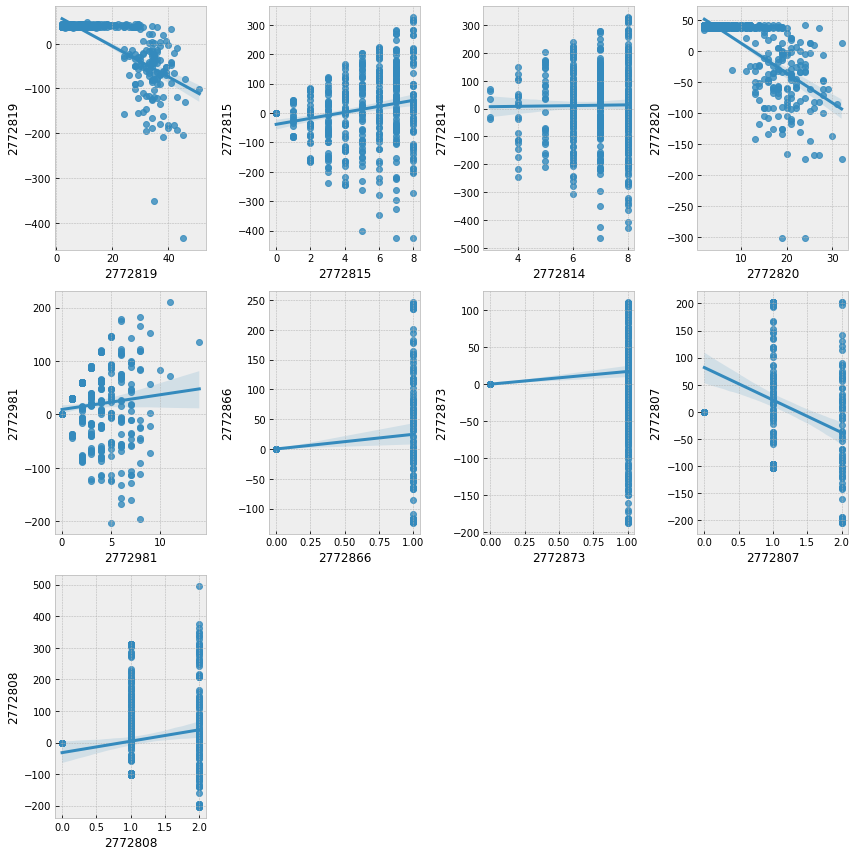

In [68]:
plt.figure(figsize= (12,12))
for i in range(0, len(best_media_2020)):
    plt.subplot(3, int(len(best_media_2020)/2), i + 1)
    sns.regplot(y = df_robos_res[best_media_2020[i]], 
                  x = df_robos_trade[best_media_2020[i]] 
                   )
    plt.tight_layout()

#### Correlação entre resultado e o número de operações dos melhores robos de 2021

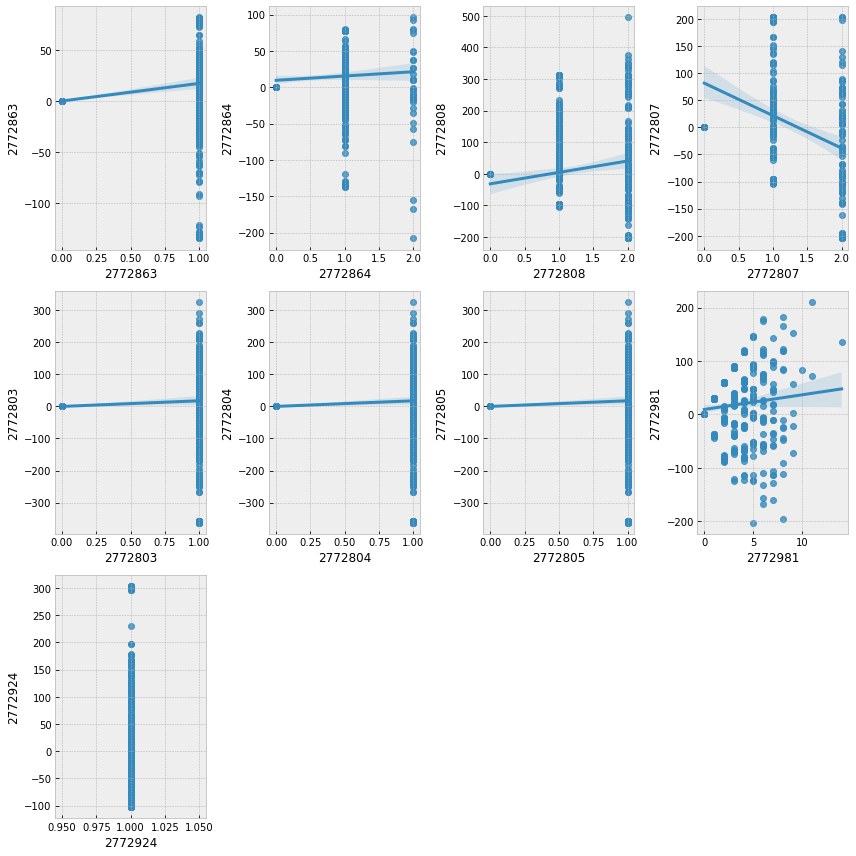

In [71]:
plt.figure(figsize= (12,12))
for i in range(0, len(best_media_2021)):
    plt.subplot(3, int(len(best_media_2021)/2), i + 1)
    sns.regplot(y = df_robos_res[best_media_2021[i]], 
                  x = df_robos_trade[best_media_2021[i]] 
                   )
    plt.tight_layout()

#### Correlação entre resultado e o número de operações dos melhores robos de 2022

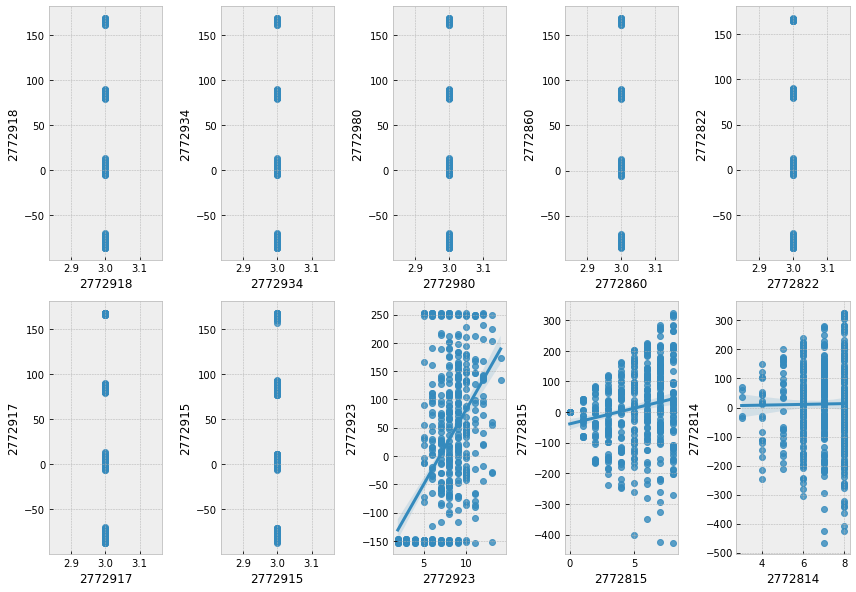

In [72]:
plt.figure(figsize= (12,12))
for i in range(0, len(best_media_2022)):
    plt.subplot(3, int(len(best_media_2022)/2), i + 1)
    sns.regplot(y = df_robos_res[best_media_2022[i]], 
                  x = df_robos_trade[best_media_2022[i]] 
                   )
    plt.tight_layout()

####  Insformações

- Não existe correlação entre o número de operações e os resultados
- robôs  que fazem mais operações tem maior volatilidade em seus resultados diários 
- Os robôs  com melhores médias nos respectivos anos não apresentam comportamento  semelhante, contudo é possível notar que estes tem uma linha de tendência superior 0 em sua grande maioria.

## Escolha dos Melhores Robos

Para escolher os melhores robôs  foi levado em conta o custo de oportunidade (o que pode perder em relação ao que pode ganhar). Como o objetivo do estudo é encontrar os robos que poderam ter melhores retornos no futuro é necessário mitigar o risco. 

Para isso os robos serão selecionados por dois critérios principais:

- Terem bons retornos médios ao longo dos anos (acima dos seus pares)
- Terem menores desvios padrões que a média dos seus pares

Assim, estes robos são capazes de manter bons resultados e tem menor probabilidade de momentos de alta volatilidade. Isso reduziria o risco e permitiria manter bons resultados.

In [73]:
df_robos_res_std = df_robos_res.groupby(by = 'Ano', as_index = False).std()

In [74]:
df_robos_res_std = df_robos_res_std.T


In [75]:
df_robos_res_std.columns = ['2020', '2021', '2022']

df_robos_res_std.drop('Ano', inplace= True)

In [76]:
df_robos_res_std.mean()

2020    63.033945
2021    64.336749
2022    62.523527
dtype: float64

In [77]:
df_best_robos = pd.merge(df_robos_res_ano_mean, 
                         df_robos_res_std, 
                         left_index=True, 
                         right_index=True,
                         suffixes= ('_media', '_df')
                        )

In [78]:
melhores_media_df = df_best_robos.loc[(df_best_robos['2020_media']>= 6) & 
                  (df_best_robos['2021_media']>= 6) & 
                  (df_best_robos['2022_media']>= 6) &
                  (df_best_robos['2020_df']<= 64) &
                  (df_best_robos['2021_df']<= 64) &
                  (df_best_robos['2022_df']<= 64)
                 ]
lista_melhores_media_df = melhores_media_df.index

In [79]:
df_melhores_media_df = df_robos_res[lista_melhores_media_df]
df_melhores_media_df['Mes'] = df_robos_res['Mes']


#### Grafíco do Retorno dos Melhores Robos ao Longo dos Meses

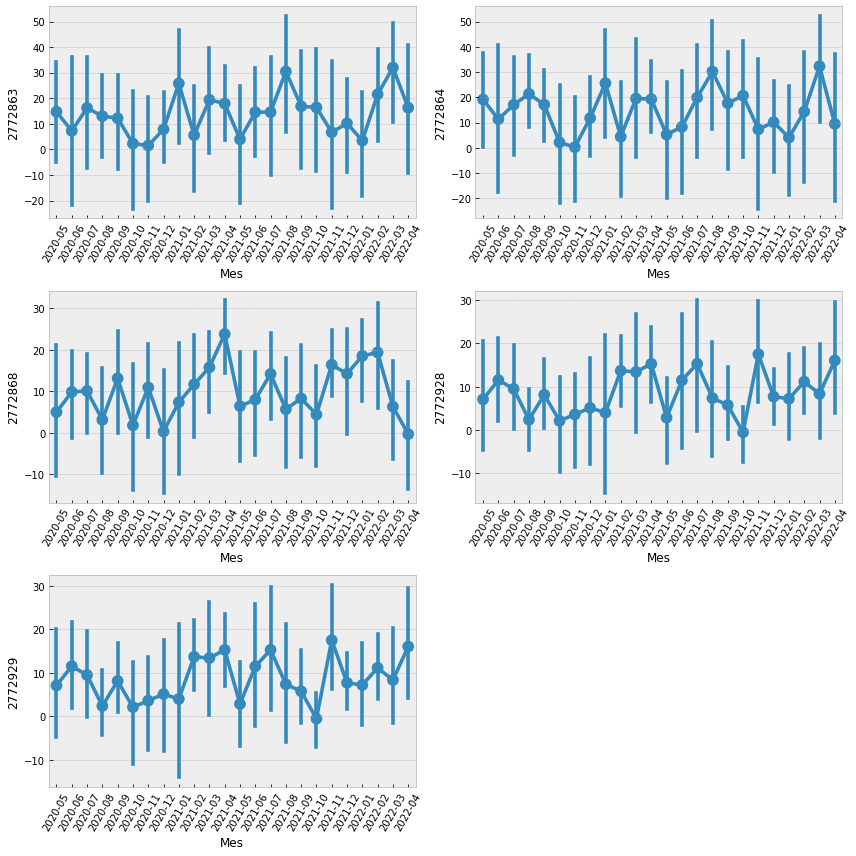

In [80]:
plt.figure(figsize= (12,12))
for i in range(0, len(lista_melhores_media_df)):
    plt.subplot(3, int(len(lista_melhores_media_df)/2), i + 1)
    sns.pointplot(y = df_melhores_media_df[lista_melhores_media_df[i]], 
                  x = df_melhores_media_df['Mes'] 
                   )
    plt.xticks(rotation= 60)
    plt.tight_layout()

#### Grafíco de Operações dos Melhores Robos ao Longo dos Meses

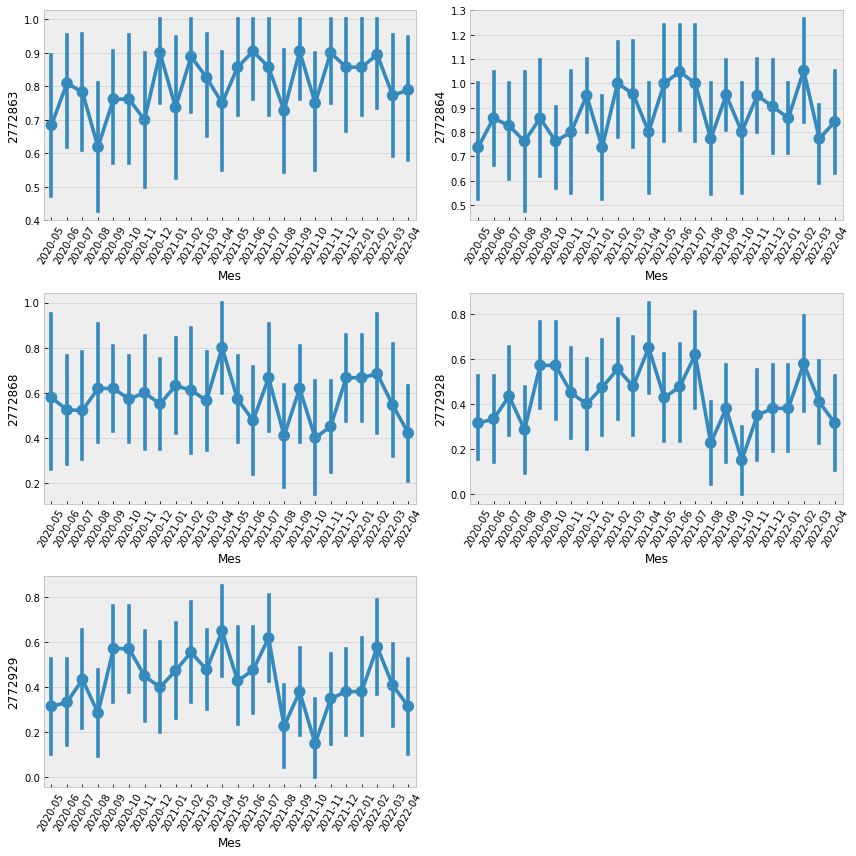

In [81]:
plt.figure(figsize= (12,12))
for i in range(0, len(lista_melhores_media_df)):
    plt.subplot(3, int(len(lista_melhores_media_df)/2), i + 1)
    sns.pointplot(y = df_robos_trade[lista_melhores_media_df[i]], 
                  x = df_melhores_media_df['Mes'] 
                   )
    plt.xticks(rotation= 60)
    plt.tight_layout()

In [82]:
df_robos_res_ano.set_index("Robos", 
              inplace = True)

In [83]:
df_robos_res_ano.loc[lista_melhores_media_df]

,2020,2021,2022
2772863,1569.0,3790.0,1495.0
2772864,2092.0,3919.0,1251.0
2772868,1139.0,2804.0,890.0
2772928,1035.5,2343.0,852.0
2772929,1035.5,2343.0,852.0


## Conclusão

- Os melhores robos são `2772863`, `2772864`, `2772868`, `2772928`, `2772929`;
- Estes robos não apresentam um número grande de operações por mês, reduzindo volatilidade;
- A maioria dos meses eles se mantem posítivos em relação a sua média;